In [2]:
import numpy as np
import os
import matplotlib.pyplot as pl
from tqdm import tqdm

from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import imageio.v3 as imageio

In [26]:
ROOT_PREFIX = "data_venus/arecibo_radar/pds-geosciences.wustl.edu/venus/arcb_nrao-v-rtls_gbt-3-delaydoppler-v1/vrm_90xx/"
#IMAGE_PREFIX = ROOT_PREFIX + "OCP_GLOBAL_TRIAGE/"
#IMAGE_PREFIX = ROOT_PREFIX + "SUPERRESOLUTION_ROT_TRIAGE/"
#IMAGE_PREFIX = ROOT_PREFIX + "SUPERRESOLUTION_4STACK_ROT_TRIAGE/"
#IMAGE_PREFIX = ROOT_PREFIX + "SUPERRESOLUTION_MARGOT_ROT_TRIAGE/"
#IMAGE_PREFIX = ROOT_PREFIX + "PARAM_ROT_4STACK_TRIAGE/"
IMAGE_PREFIX = ROOT_PREFIX + "PARAM_4STACK_TRIAGE/"
#IMAGE_PREFIX = ROOT_PREFIX + "PARAM_FULLSTACK_TRIAGE/"

YEAR1 = '2015'
YEAR2 = '2017'
POL = 'scp'

len(FILENAMES1)=398, len(FILENAMES2)=453


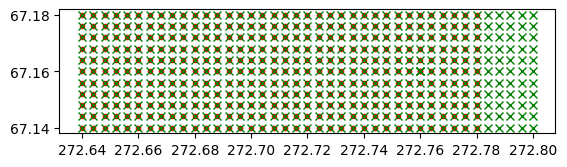

In [39]:
filenames = os.listdir(IMAGE_PREFIX)
filenames.sort()

FILENAMES1 = []
FILENAMES2 = []
ROT = []
RA = []
DEC = []
ROT2 = []
RA2 = []
DEC2 = []

for filename in filenames:
    if not '_rot' in filename: continue

    rot = float(filename[(filename.find("rot_") + 4):].split(' ')[0])
    ra = float(filename[(filename.find("ra_") + 3):].split('_')[0])
    dec = float(filename[(filename.find("dec_") + 4):].split('_')[0])

    if abs(rot - -243.0208) > 0.0001: continue
    #if ra > 272.74: continue

    #if ra != 272.76: continue
    #if dec != 67.16: continue

    if f'venus_{POL}_{YEAR1}' in filename: 
        FILENAMES1.append(filename)
        ROT.append(rot)
        RA.append(ra)
        DEC.append(dec)
    if f'venus_{POL}_{YEAR2}' in filename: 
        FILENAMES2.append(filename)
        # Only add the parameters once!
        ROT2.append(rot)
        RA2.append(ra)
        DEC2.append(dec)

if 1: # debug
    print(f"{len(FILENAMES1)=}, {len(FILENAMES2)=}")
    #pl.plot(ROT)
    pl.figure()
    pl.plot(RA, DEC, 'r.')
    pl.plot(RA2, DEC2, 'gx')
    pl.axis('scaled')

In [ ]:
if 0:  # Quick-load cached images
    import pickle
    ROT = []
    RA = []
    DEC = []

    FILENAMES1, IMAGES1 = pickle.load(open(IMAGE_PREFIX + f'rot_{POL}_{YEAR1}.pkl', 'rb'))
    FILENAMES2, IMAGES2 = pickle.load(open(IMAGE_PREFIX + f'rot_{POL}_{YEAR2}.pkl', 'rb'))

    for filename in FILENAMES1:
        if not 'rot' in filename: continue
        rot = float(filename[(filename.find("rot_") + 4):].split(' ')[0])
        ra = float(filename[(filename.find("ra_") + 3):].split('_')[0])
        dec = float(filename[(filename.find("dec_") + 4):].split('_')[0])
        ROT.append(rot)
        RA.append(ra)
        DEC.append(dec)

In [ ]:
if 0:  # Preload images (slow!)
    IMAGES1 = []
    IMAGES2 = []
    for i in tqdm(range(len(FILENAMES2))):
        # Drop the bottom half of the images to save RAM, since we're looking at the northern hemisphere.
        IMAGES1.append(imageio.imread(IMAGE_PREFIX + FILENAMES1[i])[:8000].copy())
        IMAGES2.append(imageio.imread(IMAGE_PREFIX + FILENAMES2[i])[:8000].copy())

In [ ]:
if 0:  # Cache image (slow!)
    import pickle
    pickle.dump((FILENAMES1, IMAGES1), open(IMAGE_PREFIX + f'rot_{YEAR1}.pkl', 'wb'))
    pickle.dump((FILENAMES2, IMAGES2), open(IMAGE_PREFIX + f'rot_{YEAR2}.pkl', 'wb'))

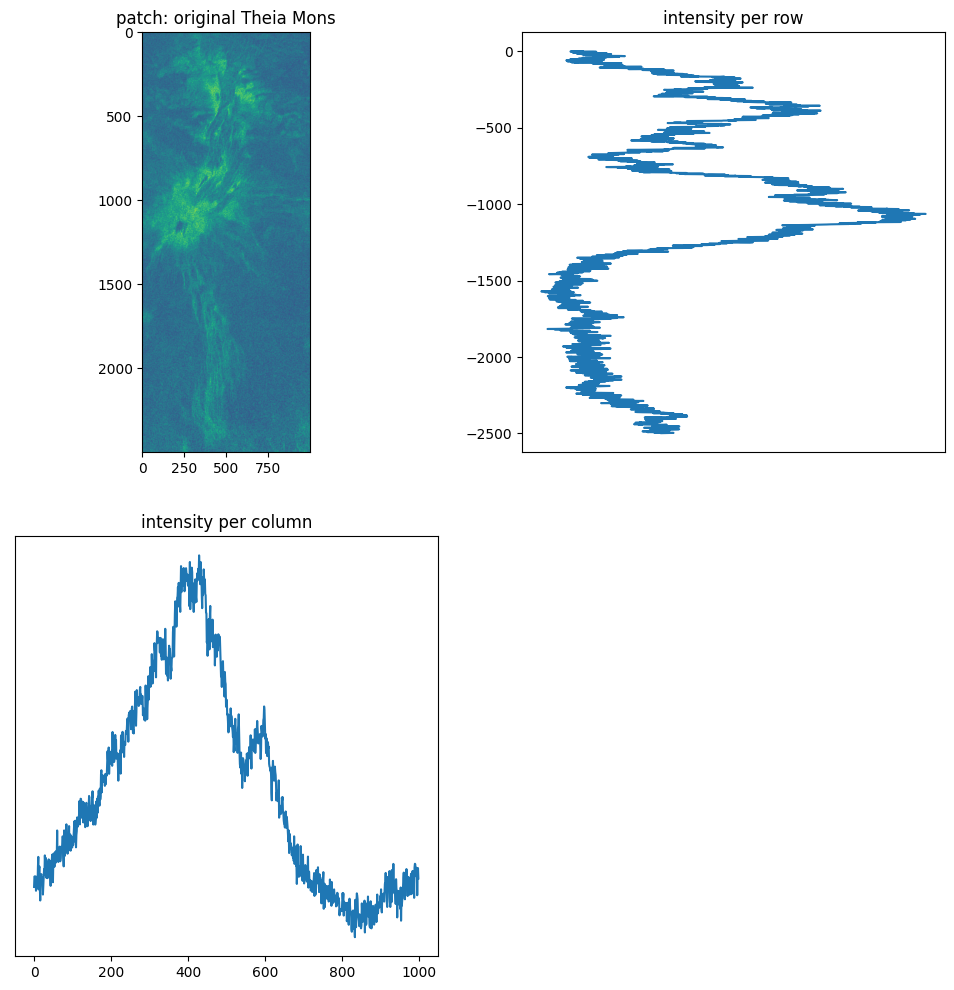

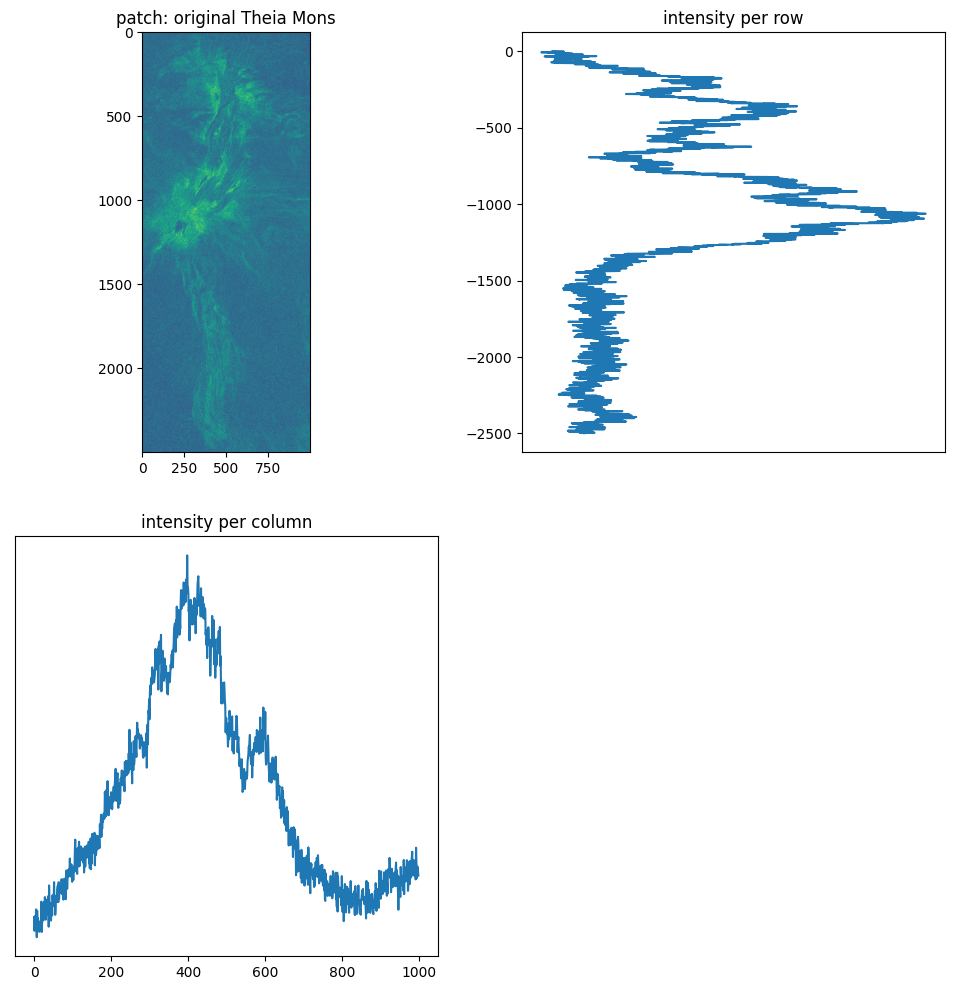

In [59]:
# Specify a patch, or region of interest
#patch_name = "big vertical slice"
#w, h, rc, cc = (2000, 5000, 5000, 8000)
#
#patch_name = "big horizontal slice"
#w, h, rc, cc = (10000, 1000, 6000, 6000)
#
#patch_name = "Maxwell Montes"
#w, h, rc, cc = 3000, 1500, 2200, 8000
#
#patch_name = "Gula Mons"
#w, h, rc, cc = 500, 500, 6000, 7900
#
patch_name = "Theia Mons"
w, h, rc, cc = 1000, 2500, 6000, 1200
#
#patch_name = "Ariadne crater"
#w, h, rc, cc = 150, 150, 5379, 8050
#
#patch_name = "Lenore crater"
#w, h, rc, cc = 100, 100, 4490, 2480
#
#patch_name = "??? crater"
#w, h, rc, cc = 100, 100, 4490, 2480

# Calculate patch corners
rs = rc - h // 2
re = rs + h
cs = cc - w // 2
ce = cs + w

if 1:  # debug visualization
    def plotPatch(patch):
        pl.figure(figsize=(12, 12))
        pl.subplot(2, 2, 1)
        pl.imshow(patch)
        pl.title(f"patch: original {patch_name}")
        pl.subplot(2, 2, 3)
        pl.plot(np.sum(patch, axis=0))
        pl.title("intensity per column")
        pl.gca().get_yaxis().set_visible(False)
        pl.subplot(2, 2, 2)
        pl.plot(np.sum(patch, axis=1), -np.arange(patch.shape[0]))
        pl.title("intensity per row")
        pl.gca().get_xaxis().set_visible(False)

    # Load from disk
    #image1 = imageio.imread(IMAGE_PREFIX + FILENAMES1[i])
    #image2 = imageio.imread(IMAGE_PREFIX + FILENAMES2[i])
    # Load from cache
    #image1 = IMAGES1[i]
    #image2 = IMAGES2[i]
    plotPatch(image1[rs:re, cs:ce])
    plotPatch(image2[rs:re, cs:ce])

In [ ]:
if 0:  # Visualization, and play around with misalignment
    #for i in range(99):
    #for i in (53,):
    for i in (0,):
        #i = 100
        #for dr in range(-10, 10):
        #        i = 52
        filename = FILENAMES1[i]
        substring_i = filename.find("rot_") + 4
        rot = float(filename[substring_i:].split(' ')[0])
        print(f"{rot=}")
        #    image1 = imageio.imread(IMAGE_PREFIX + f1998[i])
        #    image2 = imageio.imread(IMAGE_PREFIX + f2017[i])
        image1 = IMAGES1[i]
        image2 = IMAGES2[i]

        if 1:
            print(f"{dr=}")
            patch1 = image1[rs:re, cs:ce]
            patch2 = image2[(rs + dr):(re + dr), (cs + dc):(ce + dc)]

            if 0:
                SCALE = 8
                HEIGHT = patch1.shape[0] // SCALE
                WIDTH = patch1.shape[1] // SCALE
                patch1 = patch1.reshape(HEIGHT, SCALE, WIDTH, SCALE) 
                patch1 = patch1.mean((1, 3))
                patch2 = patch2.reshape(HEIGHT, SCALE, WIDTH, SCALE) 
                patch2 = patch2.mean((1, 3))

            if 1:
                SIZE = 4
                x, y = np.mgrid[-SIZE:SIZE+1, -SIZE:SIZE+1]
                g = np.exp(-(x**2 + y**2) / SIZE)
                patch1 = scipy.signal.convolve(patch1, g, mode='valid')
                patch2 = scipy.signal.convolve(patch2, g, mode='valid')

            patch1 -= patch1.min()
            patch1 /= patch1.max()

            patch2 -= patch2.min()
            patch2 /= patch2.max()

            if 1:
                pl.clf()
                pl.figure(figsize=(8, 8))
                pl.subplot(2, 2, 1)
                pl.imshow(patch1)
                pl.grid()
                pl.title('Blurred Image 1')
                pl.subplot(2, 2, 3)
                pl.imshow(patch2)
                pl.grid()
                pl.title('Blurred Image 2')
                pl.subplot(2, 2, 2)
                pl.imshow(patch1 + patch2)
                pl.grid()
                pl.title('Blurred Image 1 + Blurred Image 2')
                pl.subplot(2, 2, 4)
                pl.imshow(patch1 * patch2)
                pl.grid()
                pl.title('Blurred Image 1 * Blurred Image 2')
                #pl.savefig(f"rotation_period_ariadne/rotation_period_ariadne_rot_{rot:0.5f}_dr_{dr}.png")

            score = np.sum(patch1 * patch2)
            print(f"{score=}")

In [41]:
import scipy

C_SCORE = []
GE_SCORE = []
GD_SCORE = []

for i in tqdm(range(len(FILENAMES1))):
    # Load directly
    image1 = imageio.imread(IMAGE_PREFIX + FILENAMES1[i])
    image2 = imageio.imread(IMAGE_PREFIX + FILENAMES2[i])
    # Load from cache
    #image1 = IMAGES1[i]
    #image2 = IMAGES2[i]

    patch1 = image1[rs:re, cs:ce].astype('f')
    patch2 = image2[rs:re, cs:ce].astype('f')

    if 0:  # Normalize the patches
        patch1 -= patch1.min()
        patch1 /= patch1.max()
        patch2 -= patch2.min()
        patch2 /= patch2.max()

    if 0: # Normalize the intensity in each column to avoid bias from horizontal gradients
        patch1 = patch1 / np.sum(patch1, axis=0)
        patch2 = patch2 / np.sum(patch2, axis=0)
    if 0: # Same thing for the rows
        patch1 = (patch1.T / np.sum(patch1, axis=1)).T
        patch2 = (patch2.T / np.sum(patch2, axis=1)).T

    if 0:  # debug
        pl.figure()
        pl.imshow(patch1)
        pl.figure()
        pl.imshow(patch2)

    if 0:  # Downscale with SCALE x SCALE averaging.
        SCALE = 4
        HEIGHT = patch1.shape[0] // SCALE
        WIDTH = patch1.shape[1] // SCALE
        patch1 = patch1.reshape(HEIGHT, SCALE, WIDTH, SCALE) 
        patch1 = patch1.mean((1, 3))
        patch2 = patch2.reshape(HEIGHT, SCALE, WIDTH, SCALE) 
        patch2 = patch2.mean((1, 3))

    if 0:  # Blur horizontally
        SIZE = 16
        x, y = np.mgrid[-SIZE:SIZE+1, -SIZE:SIZE+1]
        g = np.exp(-(x**2 + y**2) / SIZE)
        patch1 = scipy.signal.convolve(patch1, g, mode='valid')
        patch2 = scipy.signal.convolve(patch2, g, mode='valid')

    if 0:  # Blur vertically
        SIZE = 16
        x, y = np.mgrid[-SIZE:SIZE+1, -SIZE:SIZE+1]
        g = np.exp(-(x**2 + y**2) / SIZE)
        patch1 = scipy.signal.convolve(patch1.T, g, mode='valid').T
        patch2 = scipy.signal.convolve(patch2.T, g, mode='valid').T

    if 0:  # debug
        pl.figure()
        pl.imshow(patch1)
        pl.figure()
        pl.imshow(patch2)
        break

    # Correlation score
    score = np.sum((patch1 - patch1.mean()) * (patch2 - patch2.mean())) / np.sqrt(patch1.var() * patch2.var())
    C_SCORE.append(score)
    
    # Merged image
    patch = patch1 + patch2
    #patch = patch1

    # Squared gradient score
    ge_score = (np.sum(np.diff(patch, axis=0)**2) + np.sum(np.diff(patch, axis=1)**2)) / patch.mean()**2
    GE_SCORE.append(ge_score)

    # Sobel score (approximation of gaussian difference)
    gd_score = np.mean(scipy.ndimage.sobel(patch, axis=0)**2 + scipy.ndimage.sobel(patch, axis=1)**2)
    GD_SCORE.append(gd_score)
    


100%|█████████████████████████████████████████████████████████| 398/398 [19:40<00:00,  2.97s/it]


49417.645


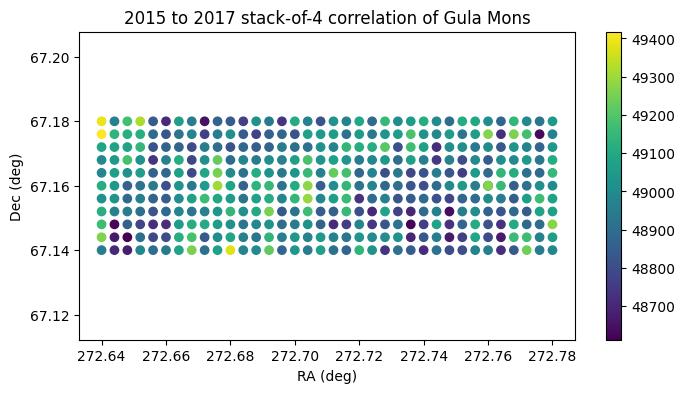

In [46]:
#%matplotlib widget

ROTa = np.array(ROT)
RAa = np.array(RA)
DECa = np.array(DEC)
#SCOREa = np.array(C_SCORE)
#SCOREa = np.array(GE_SCORE)
SCOREa = np.array(GD_SCORE)

print(SCOREa.max())

#IPSa -= IPSa.min()
#IPSa /= IPSa.max()

if 0: # Convert scores to arrays and normalize
    GE_SCORE = np.array(GE_SCORE)
    GE_SCORE -= GE_SCORE.min()
    GE_SCORE /= GE_SCORE.max()

    GD_SCORE = np.array(GD_SCORE)
    GD_SCORE -= GD_SCORE.min()
    GD_SCORE /= GD_SCORE.max()

    pl.plot(ROT, GE_SCORE)
    pl.plot(ROT, GD_SCORE)
    pl.legend(("squared gradient", "sobel"))

if 0:
    pl.plot(ROTa, SCOREa, '.')
    pl.xlabel("Venus rotational period (days)")
    pl.gca().get_yaxis().set_visible(False)

#pl.plot(RAa, SCOREa, '.')
#pl.xlabel("Venus North Pole right ascension (degrees)")

#pl.plot(DECa, SCOREa, '.')
#pl.xlabel("Venus North Pole declination (degrees)")

#RAa = RAa.reshape((11, 11))
#DECa = DECa.reshape((11, 11))
#SCOREa = SCOREa.reshape((11, 11))

if 1:
    fig = pl.figure(figsize=(8, 4))
    ax = fig.add_subplot()
    #ax = fig.add_subplot(projection='3d')
    #ax.scatter(RAa, DECa, SCOREa, c=SCOREa, cmap='jet')
    sc = ax.scatter(RAa, DECa, c=SCOREa)
    ax.set_xlabel('RA (deg)')
    ax.set_ylabel('Dec (deg)')
    ax.axis('equal')
    #ax.set_zlabel('Correlation (raw)')
    #ax.plot_surface(RAa, DECa, SCOREa, cmap=cm.coolwarm)
    #pl.title(f"1988 to 2017 single-observation correlation of {patch_name}")
    pl.title(f"{YEAR1} to {YEAR2} stack-of-4 correlation of {patch_name}")
    #pl.title(f"{YEAR1} full stack sobel score of {patch_name}")
    #pl.grid()
    pl.colorbar(sc)

    #pl.savefig(f"ra_dec_vs_correlation_{YEAR1}_{YEAR2}_noblur_{patch_name}_4stack_{POL}.png")
    pl.savefig(f"ra_dec_vs_sobel_{YEAR1}_noblur_{patch_name}_fullstack_{POL}.png")


In [12]:
max_i = np.argmax(SCOREa)
print(f"{max_i=}, {ROT[max_i]=}, {RA[max_i]=}, {DEC[max_i]=}, {SCOREa[max_i]=}")
if 0:
    patch1 = IMAGES1[max_i][rs:re, cs:ce].astype('f')
    patch2 = IMAGES2[max_i][rs:re, cs:ce].astype('f')
    pl.clf()
    pl.figure(figsize=(16, 16))
    pl.subplot(2, 2, 1)
    pl.imshow(patch1)
    pl.grid()
    pl.title('Patch 1')
    pl.subplot(2, 2, 3)
    pl.imshow(patch2)
    pl.grid()
    pl.title('Patch 2')
    pl.subplot(2, 2, 2)
    pl.imshow(patch1 + patch2)
    pl.grid()
    pl.title('Patch 1 + Patch 2')
    pl.subplot(2, 2, 4)
    pl.imshow(patch1 * patch2)
    pl.grid()
    pl.title('Patch 1 * Patch 2')
    
    pl.savefig(f"patches_rot_{ROT[max_i]}_ra_{RA[max_i]}_dec_{DEC[max_i]}_{patch_name}_4stack_{POL}.png")

max_i=427, ROT[max_i]=-243.0208, RA[max_i]=272.776, DEC[max_i]=67.128, SCOREa[max_i]=1910.1362


## Curve smoothing/fits

In [ ]:
# Normalize parameters for curve fitting/smoothing
x = ROTa.copy()
y = SCOREa.copy()

x_min = x.min()
x -= x_min
x_max = x.max()
x /= x_max

y_min = y.min()
y -= y_min
y_max = y.max()
y /= y_max

In [ ]:
if 1:  # Smooth with SavGol filter
    from scipy.signal import savgol_filter
    
    yhat = savgol_filter(y, 51, 3)
    #yhat = savgol_filter(y, 21, 3)
    #yhat = savgol_filter(y, 5, 3)
    
    #pl.plot(x, y, '.')
    #pl.plot(x, yhat, '.')
    
    pl.plot(ROTa, SCOREa, '.')
    pl.plot(x * x_max + x_min, yhat * y_max + y_min, '-')
    #pl.plot(x * x_max + x_min, yhat, '-')
    #pl.title(f"1988 to 2017 single-observation correlation of '{patch_name}'")
    pl.title(f"{YEAR1} to {YEAR2} stack-of-4 correlation of '{patch_name}'")
    pl.xlabel("Venus rotational period (days)")
    pl.grid()
    
    max_i = np.argmax(yhat)
    print(f"{max_i=}")
    print(f"smoothed max rot={ROT[max_i]}")
    
    pl.text(0.8, 0.9, f"savgol peak={ROT[max_i]}", horizontalalignment='center',
           verticalalignment='center', transform=pl.gca().transAxes, bbox=dict(facecolor='black', alpha=0.5))
    pl.gca().get_yaxis().set_visible(False)

In [ ]:
if 0:  # Fit a gaussian
    from scipy.optimize import curve_fit
    n = len(x)
    mean = sum(x * y) / n
    sigma = sum(y * (x - mean)**2) / n
    
    def gaus(x, a, x0, sigma):
        return a *np.exp(-(x-x0)**2 / (2*sigma**2))
    
    popt, pcov = curve_fit(gaus, x, y, p0=[1, mean, sigma])
    
    pl.plot(x, y, '.')
    pl.plot(x, gaus(x, *popt), '.')